In [1]:
import pandas as pd
import pickle
import os

In [2]:
def read_pickle(fname):# if data.pickle doesn't exist, create it
    if not os.path.exists(fname):
        data = {}
        with open("data.pickle", "wb") as f:
            pickle.dump({}, f)
        return data
    else:
        with open(fname, "rb") as f:
            data = pickle.load(f)
        return data

In [3]:
# Unpickle file "data.pickle"
data = pd.read_pickle("data.pickle")

# Remove items from data that have no value
data = {k:v for k,v in data.items() if v is not None}


In [4]:
student_ids = list(data.keys())

In [5]:
student_ids[-1]

201768935

In [6]:
def get_modules(data):
    modules = []

    for df in data["academic_history"]:
        # Make row 1 headers
        df.columns = df.iloc[1]
        # Remove row 1
        df = df.iloc[1:]
        if "Subject" in df.columns:
            # Subset for rows where "Module" is only length 3
            df = df[df["Module"].str.len() == 3]
            modules.extend(df["Module"].tolist())
    return list(set(modules))

In [7]:
def get_programme(data):

    for df in data["current_modules"]:
        # Make row 1 headers
        df.columns = df.iloc[1]
        # Remove row 1
        df = df.iloc[1:]
        if "Program" in df.columns:
            try:
                return df["Program"].iloc[1]
            except:
                return None

In [8]:
student_modules = {}
for student_id in student_ids:
    student_modules[student_id] = {
        "modules": get_modules(data[student_id]),
        "programme": get_programme(data[student_id])
    }

In [9]:
# Get all programme values as set
programmes = set([v["programme"] for v in student_modules.values()])

In [10]:
# Remove None values
programmes = [p for p in programmes if p is not None]

# filter programmes that contain "BSC" and count frequency
programmes = [p for p in programmes if "BSC" in p]




In [11]:
programme_counts = {p:0 for p in programmes}
for student_id, values in student_modules.items():
    for programme in programmes:
        if programme == values["programme"]:
            programme_counts[programme] += 1

In [12]:
programme_counts

{'BSC Physiotherapy': 2,
 'BSC Biological & Medical Sci': 477,
 'BSC Pharmacol w Sem China Stds': 1,
 'BSC Biovet Sci w China Stds 4': 1,
 'BSC Zoology': 153,
 'BSC Orthoptics': 1,
 'BSC Chemistry': 2,
 'BSC Biological & Med Sci w YA': 2,
 'BSC Psychology': 4,
 'BSC Bioveterinary Science w YA': 2,
 'BSC Human Physiology': 43,
 'BSC Geography': 1,
 'BSC Tropical Disease Biology': 49,
 'BSC An & Hm Biol(Intercalated)': 1,
 'BSC Biolog Sci w Year in China': 1,
 'BSC Biovet Sci w SinC & SinInd': 1,
 'BSC Trp Dis Biol(Intercalated)': 1,
 'BSC Biological Sci w Yr Abroad': 3,
 'BSC Genetics': 68,
 'BSC Anatomy & Human Biology': 168,
 'BSC Zoology w Year Abroad': 2,
 'BSC Biochemistry': 276,
 'BSC Biological Sciences': 532,
 'BSC Pharmacology': 143,
 'BSC Diagnostic Radiography': 4,
 'BSC Evolutionary Anthropology': 1,
 'BSC Medicinal Chemistry': 2,
 'BSC Vet Con Med (Intercalated)': 15,
 'BSC Bioveterinary Science': 131,
 'BSC Marine Biology': 7,
 'BSC Mathematics': 1,
 'BSC Microbiology': 10

In [13]:
biosci = [k for k,v in student_modules.items() if v["programme"] == "BSC Biological Sciences"]

# remove students in biosci with no modules
biosci = [b for b in biosci if len(student_modules[b]["modules"]) > 0]

In [14]:
all_lists = [student_modules[b]["modules"] for b in biosci]

In [15]:
# Remove all items from all lists that do not begin with a digit
all_lists = [[x for x in l if x[0].isdigit()] for l in all_lists]

# Convert all strings in all lists to int
all_lists = [[int(x) for x in l] for l in all_lists]

In [16]:
# Only keep lists that have any items greater than 300
all_lists = [l for l in all_lists if any([x > 300 for x in l])]

# Remove items from lists that are less than 200
all_lists = [[x for x in l if x > 300] for l in all_lists]

# Remove items from list that are greater than 400
all_lists = [[x for x in l if x < 400] for l in all_lists]

In [17]:
# make all values string
all_lists = [[str(x) for x in l] for l in all_lists]

In [18]:
all_modules = set([int(x) for l in all_lists for x in l])


In [69]:
# create a list of all possible choice of three modules from all_modules
all_combinations = []
for i in range(len(all_modules)):
    for j in range(i+1, len(all_modules)):
        for k in range(j+1, len(all_modules)):
            all_combinations.append([all_modules[i], all_modules[j], all_modules[k]])

# count how many times each combination appears in all_lists
combination_counts = {tuple(c):0 for c in all_combinations}
for l in all_lists:
    for c in all_combinations:
        if set(c).issubset(set(l)):
            combination_counts[tuple(c)] += 1

# sort combinations by frequency
sorted_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)

In [70]:
sorted_combinations

[((302, 306, 321), 16),
 ((302, 321, 323), 15),
 ((322, 324, 339), 15),
 ((322, 324, 326), 12),
 ((322, 339, 364), 12),
 ((318, 320, 343), 11),
 ((322, 324, 364), 11),
 ((322, 326, 339), 11),
 ((302, 306, 323), 10),
 ((306, 321, 323), 10),
 ((320, 340, 361), 10),
 ((324, 339, 364), 10),
 ((302, 305, 321), 9),
 ((302, 320, 321), 9),
 ((305, 306, 321), 9),
 ((305, 306, 323), 9),
 ((306, 309, 311), 9),
 ((302, 318, 320), 8),
 ((322, 326, 364), 8),
 ((324, 326, 339), 8),
 ((302, 304, 306), 7),
 ((302, 305, 306), 7),
 ((302, 306, 315), 7),
 ((302, 323, 364), 7),
 ((305, 306, 320), 7),
 ((306, 320, 321), 7),
 ((314, 316, 317), 7),
 ((318, 320, 323), 7),
 ((322, 335, 364), 7),
 ((322, 337, 339), 7),
 ((302, 306, 314), 6),
 ((302, 318, 321), 6),
 ((305, 306, 311), 6),
 ((305, 306, 315), 6),
 ((305, 306, 335), 6),
 ((306, 314, 315), 6),
 ((306, 320, 335), 6),
 ((310, 322, 339), 6),
 ((313, 314, 316), 6),
 ((318, 320, 361), 6),
 ((320, 323, 343), 6),
 ((320, 359, 361), 6),
 ((322, 324, 337), 6),

In [22]:
# Convert all_modules set to a list
all_modules = list(all_modules)

# Create a list containing every possible choice of two modules
pairs = []
for i in range(len(all_modules)):
    for j in range(i+1, len(all_modules)):
        pairs.append([all_modules[i], all_modules[j]])

# Convert pairs from list to tuple
pairs = [tuple(pair) for pair in pairs]

# Count how many times each pair appears in all_lists
pair_counts = {p:0 for p in pairs}
for l in all_lists:
    for pair in pairs:
        if pair[0] in l and pair[1] in l:
            pair_counts[pair] += 1



In [23]:
pair_counts

{(399, 301): 0,
 (399, 302): 0,
 (399, 303): 0,
 (399, 304): 0,
 (399, 305): 0,
 (399, 306): 0,
 (399, 307): 0,
 (399, 309): 0,
 (399, 310): 0,
 (399, 311): 0,
 (399, 312): 0,
 (399, 313): 0,
 (399, 314): 0,
 (399, 315): 0,
 (399, 316): 0,
 (399, 317): 0,
 (399, 318): 0,
 (399, 320): 0,
 (399, 321): 0,
 (399, 322): 0,
 (399, 323): 0,
 (399, 324): 0,
 (399, 326): 0,
 (399, 327): 0,
 (399, 328): 0,
 (399, 330): 0,
 (399, 332): 0,
 (399, 333): 0,
 (399, 334): 0,
 (399, 335): 0,
 (399, 337): 0,
 (399, 338): 0,
 (399, 339): 0,
 (399, 340): 0,
 (399, 342): 0,
 (399, 343): 0,
 (399, 344): 0,
 (399, 355): 0,
 (399, 359): 0,
 (399, 361): 0,
 (399, 363): 0,
 (399, 364): 0,
 (399, 367): 0,
 (399, 383): 0,
 (301, 302): 0,
 (301, 303): 0,
 (301, 304): 0,
 (301, 305): 0,
 (301, 306): 0,
 (301, 307): 0,
 (301, 309): 0,
 (301, 310): 0,
 (301, 311): 0,
 (301, 312): 0,
 (301, 313): 0,
 (301, 314): 0,
 (301, 315): 0,
 (301, 316): 0,
 (301, 317): 0,
 (301, 318): 0,
 (301, 320): 0,
 (301, 321): 0,
 (301, 3

In [114]:
# make module1 and module2 string type
pair_counts["module1"] = pair_counts["module1"].astype(str)
pair_counts["module2"] = pair_counts["module2"].astype(str)

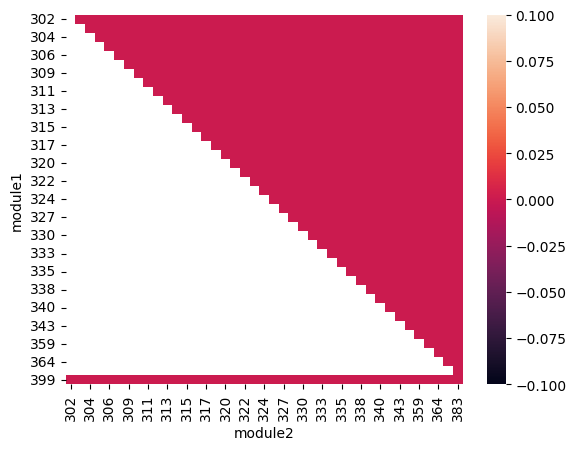

In [117]:
# Plot a 2D heat map of the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pair_counts.pivot(index="module1", columns="module2", values="count"))
plt.show()

In [111]:
matrix

array([[ 0.,  0.,  4., ...,  0.,  0.,  3.],
       [ 0.,  0.,  1., ...,  4.,  0.,  1.],
       [ 0.,  0.,  0., ...,  4.,  0., 21.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  7.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

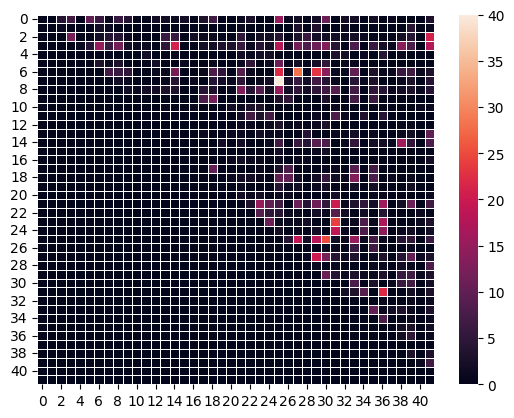

In [100]:
# Create heat map from pair counts
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create empty matrix
matrix = np.zeros((len(all_modules), len(all_modules)))

# Fill matrix with pair counts
for i in range(len(all_modules)):
    for j in range(len(all_modules)):
        pair = [all_modules[i], all_modules[j]]
        if str(pair) in pair_counts:
            matrix[i,j] = pair_counts[str(pair)]

# Create heat map
ax = sns.heatmap(matrix, linewidth=0.5)
plt.show()

In [102]:
pair_counts

{"['311', '342']": 0,
 "['311', '340']": 4,
 "['311', '320']": 7,
 "['311', '333']": 0,
 "['311', '309']": 10,
 "['311', '302']": 6,
 "['311', '304']": 1,
 "['311', '335']": 6,
 "['311', '317']": 4,
 "['311', '344']": 0,
 "['311', '383']": 0,
 "['311', '334']": 2,
 "['311', '338']": 2,
 "['311', '318']": 1,
 "['311', '307']": 2,
 "['311', '328']": 0,
 "['311', '316']": 3,
 "['311', '314']": 7,
 "['311', '303']": 0,
 "['311', '367']": 0,
 "['311', '364']": 1,
 "['311', '310']": 3,
 "['311', '339']": 0,
 "['311', '326']": 0,
 "['311', '306']": 15,
 "['311', '313']": 1,
 "['311', '321']": 2,
 "['311', '359']": 0,
 "['311', '323']": 2,
 "['311', '305']": 11,
 "['311', '322']": 0,
 "['311', '399']": 2,
 "['311', '315']": 2,
 "['311', '337']": 0,
 "['311', '312']": 2,
 "['311', '324']": 0,
 "['311', '330']": 1,
 "['311', '343']": 0,
 "['311', '327']": 0,
 "['311', '332']": 0,
 "['311', '361']": 3,
 "['342', '340']": 1,
 "['342', '320']": 0,
 "['342', '333']": 0,
 "['342', '309']": 0,
 "['342

C:\Users\treharne\AppData\Local\Temp\ipykernel_20096\869607557.py:27: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=1.5, connectionstyle='arc3,rad=0.1')


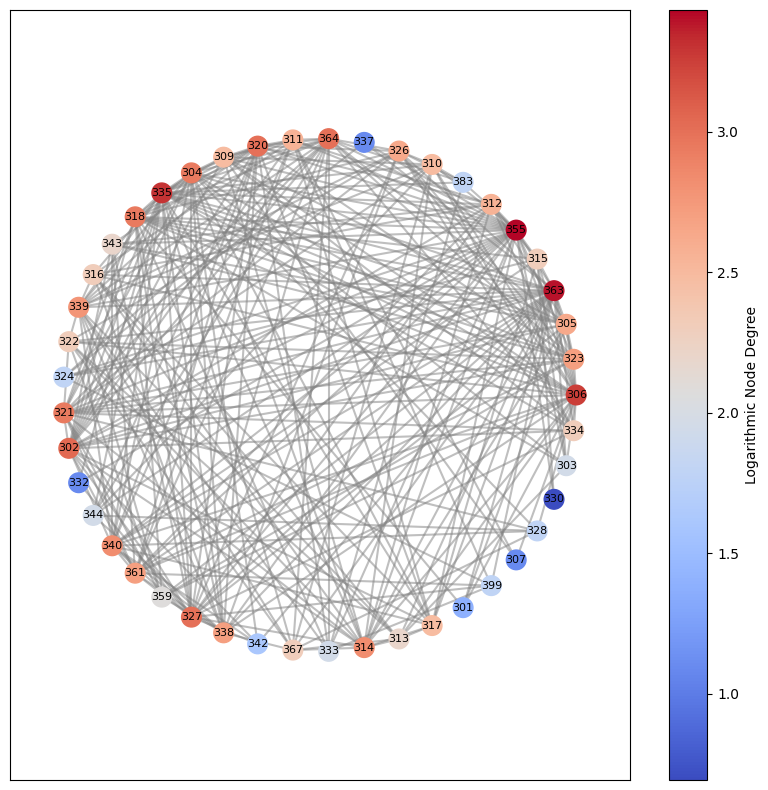

In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
for l in all_lists:
    for i in range(len(l)):
        if i < len(l) - 1:
            G.add_edge(l[i], l[i+1])
        else:
            G.add_edge(l[i], l[0])

pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10))  # Set the figure size to be square

# Get the degree of each node
node_degrees = G.degree()

# Sort the labels in numerical ascending order
sorted_labels = sorted(G.nodes())

# Create a scatter plot with colors based on logarithmic node degrees using a blue to red color scale
nodes = nx.draw_networkx_nodes(G, pos, node_color=np.log(list(dict(node_degrees).values())), cmap='coolwarm', node_size=200)

# Draw the curved edges and labels with sorted labels
edge_pos = nx.circular_layout(G, scale=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=1.5, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_labels(G, pos, labels={node: node for node in sorted_labels}, font_size=8)

# Create a colorbar using the scatter plot mappable
cbar = plt.colorbar(nodes)
cbar.set_label('Logarithmic Node Degree')

plt.axis('equal')  # Set the aspect ratio to be equal

plt.show()

In [33]:
# remove 355 and 363 from all lists
all_lists = [[int(x) for x in l if int(x) not in [355, 363, 301, 308, 319, 325, 341, 347, 331, 357, 365]] for l in all_lists]

In [44]:
# create list of all possible pairs from all_lists
pairs = []
for l in all_lists:
    for i in range(len(l)):
        for j in range(i+1, len(l)):
            pairs.append([l[i], l[j]])
            

In [45]:
# order pairs
pairs = [tuple(sorted(pair)) for pair in pairs]

In [49]:
# count frequency of each pair in all_lists
pair_counts = {p:0 for p in pairs}
for l in all_lists:
    for pair in pairs:
        if pair[0] in l and pair[1] in l:
            pair_counts[pair] += 1



In [52]:
pair_counts

{(312, 315): 100,
 (305, 315): 64,
 (306, 315): 225,
 (315, 323): 9,
 (305, 312): 9,
 (306, 312): 49,
 (312, 323): 1,
 (305, 306): 625,
 (305, 323): 121,
 (306, 323): 324,
 (337, 383): 9,
 (326, 337): 64,
 (310, 337): 4,
 (337, 364): 25,
 (326, 383): 49,
 (310, 383): 49,
 (364, 383): 4,
 (310, 326): 25,
 (326, 364): 100,
 (310, 364): 9,
 (305, 320): 169,
 (309, 320): 16,
 (306, 320): 324,
 (311, 320): 49,
 (305, 309): 25,
 (305, 311): 121,
 (306, 309): 121,
 (309, 311): 100,
 (306, 311): 225,
 (320, 335): 144,
 (318, 335): 9,
 (304, 335): 4,
 (323, 335): 25,
 (318, 320): 441,
 (304, 320): 36,
 (320, 323): 121,
 (304, 318): 16,
 (318, 323): 81,
 (304, 323): 49,
 (312, 320): 36,
 (312, 343): 4,
 (312, 318): 4,
 (315, 320): 64,
 (320, 343): 196,
 (315, 343): 9,
 (315, 318): 25,
 (318, 343): 256,
 (316, 335): 16,
 (315, 316): 81,
 (312, 316): 49,
 (316, 320): 4,
 (315, 335): 49,
 (312, 335): 25,
 (322, 324): 484,
 (322, 337): 81,
 (322, 339): 576,
 (322, 326): 361,
 (324, 337): 64,
 (324, 

In [53]:
pair_counts

{(312, 315): 100,
 (305, 315): 64,
 (306, 315): 225,
 (315, 323): 9,
 (305, 312): 9,
 (306, 312): 49,
 (312, 323): 1,
 (305, 306): 625,
 (305, 323): 121,
 (306, 323): 324,
 (337, 383): 9,
 (326, 337): 64,
 (310, 337): 4,
 (337, 364): 25,
 (326, 383): 49,
 (310, 383): 49,
 (364, 383): 4,
 (310, 326): 25,
 (326, 364): 100,
 (310, 364): 9,
 (305, 320): 169,
 (309, 320): 16,
 (306, 320): 324,
 (311, 320): 49,
 (305, 309): 25,
 (305, 311): 121,
 (306, 309): 121,
 (309, 311): 100,
 (306, 311): 225,
 (320, 335): 144,
 (318, 335): 9,
 (304, 335): 4,
 (323, 335): 25,
 (318, 320): 441,
 (304, 320): 36,
 (320, 323): 121,
 (304, 318): 16,
 (318, 323): 81,
 (304, 323): 49,
 (312, 320): 36,
 (312, 343): 4,
 (312, 318): 4,
 (315, 320): 64,
 (320, 343): 196,
 (315, 343): 9,
 (315, 318): 25,
 (318, 343): 256,
 (316, 335): 16,
 (315, 316): 81,
 (312, 316): 49,
 (316, 320): 4,
 (315, 335): 49,
 (312, 335): 25,
 (322, 324): 484,
 (322, 337): 81,
 (322, 339): 576,
 (322, 326): 361,
 (324, 337): 64,
 (324, 

In [54]:
rows = []
for pair, count in pair_counts.items():
    rows.append([pair[0], pair[1], count])

df = pd.DataFrame(rows, columns=["module1", "module2", "count"])

In [56]:
# order df by module1, module2
df = df.sort_values(["module1", "module2"])

In [57]:
df

,module1,module2,count
308,302,303,25
87,302,304,49
68,302,305,196
67,302,306,484
276,302,309,9
...,...,...,...
412,361,399,1
375,364,367,4
16,364,383,4
229,364,399,1


ValueError: Unknown format code 'd' for object of type 'float'

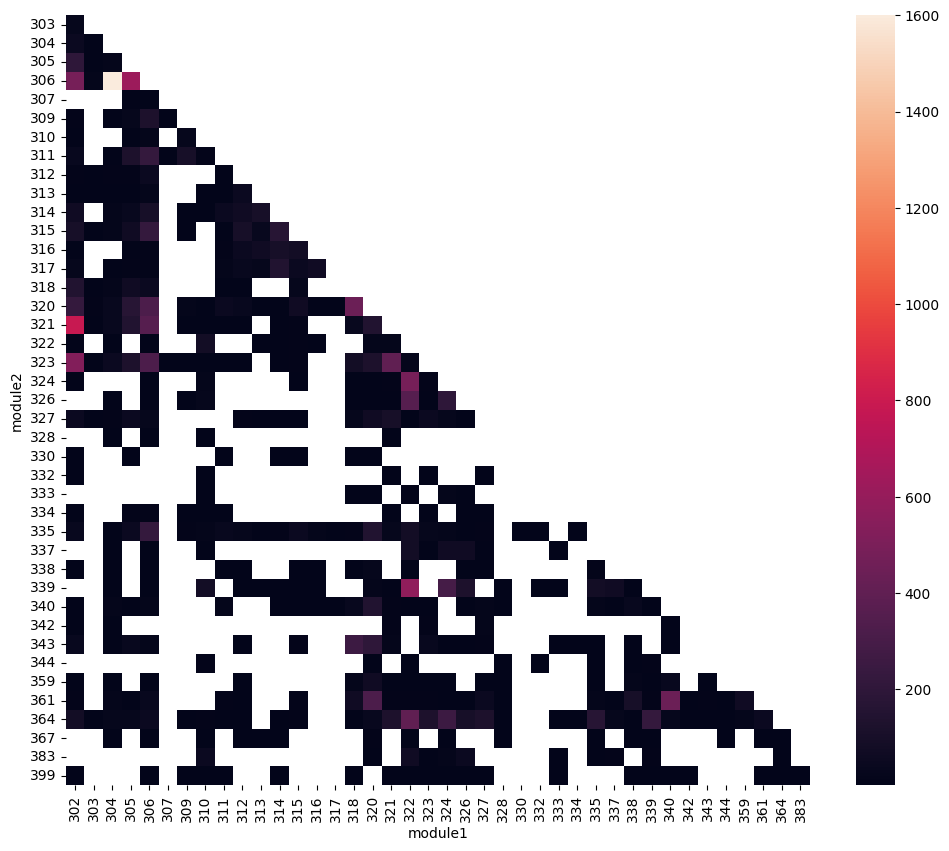

In [67]:
# create heat map from df
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "count" column to integers
df["count"] = df["count"].astype(int)

plt.figure(figsize=(12, 10))  # Increase the figure size

sns.heatmap(df.pivot(index="module2", columns="module1", values="count"), annot=True, fmt="d")  # Add annot=True and fmt="d" to display labels

plt.show()